# Homework

This example shows how to do timeseries classification from scratch, starting from raw
CSV timeseries files on disk. We demonstrate the workflow on the FordA dataset from the
[UCR/UEA archive](https://www.cs.ucr.edu/%7Eeamonn/time_series_data_2018/).

## Setup

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.metrics import accuracy_score
from numpy.random import default_rng

from sktime.utils.data_processing import (
    from_2d_array_to_nested,
    from_nested_to_2d_array,
    is_nested_dataframe,
)

## Load the data: the FordA dataset

### Read the TSV data

We will use the `FordA_TRAIN` file for training and the
`FordA_TEST` file for testing. The simplicity of this dataset
allows us to demonstrate effectively how to use ConvNets for timeseries classification.
In this file, the first column corresponds to the label.

In [2]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

x_train, y_train = readucr("../../data/FordA_TRAIN.tsv")
x_test, y_test = readucr("../../data/FordA_TEST.tsv")

# Problem 1: `Sktime Time Series Data Formatting`
Re-read [Sktime's good documentation](https://www.sktime.org/en/latest/examples/loading_data.html) of data formats, with special attention to the [section on tablular data](https://www.sktime.org/en/latest/examples/loading_data.html#Using-tabular-data-with-sktime)

* Convert `x_train` & `x_test` to their nested/sktime representation & name them `x_train_nested` & `x_test_nested`
* Print the head of the `x_train_nested` DF


In [3]:
x_train_nested = from_2d_array_to_nested(x_train)
x_test_nested = from_2d_array_to_nested(x_test)
print(f"The nested Training DataFrame has shape {x_train_nested.shape}")
print(f"The nested Test DataFrame has shape {x_test_nested.shape}")
x_train_nested.head()

The nested Training DataFrame has shape (3601, 1)
The nested Test DataFrame has shape (1320, 1)


,0
0,0 -0.797172 1 -0.664392 2 -0.37301...
1,0 0.804855 1 0.634629 2 0.37347...
2,0 0.727985 1 0.111284 2 -0.49912...
3,0 -0.234439 1 -0.502157 2 -0.73248...
4,0 -0.171328 1 -0.062285 2 0.23582...


# Problem 2: `Apply a TimeSeriesForestClassifier`

* Fit a `TimeSeriesForestClassifier` to `x_train_nested`
* Predict using `x_test_nested`
* Print the Classifier's accuracy score


*Hint: Use `n_jobs=-1` parameter to the classifer to use all the cores on your machine*

In [18]:
from sktime.classification.interval_based import TimeSeriesForestClassifier

classifier = TimeSeriesForestClassifier(n_jobs=-1)
classifier.fit(x_train_nested, y_train)
classifier_score = classifier.score(x_test_nested, y_test)
print("classifier_score = ",classifier_score)

classifier_score =  0.806060606060606


# Problem 3: `Apply a ComposableTimeSeriesForestClassifier`

* Fit a `ComposableTimeSeriesForestClassifier` to `x_train_nested`
* Predict using `x_test_nested`
* Print the Classifier's accuracy score

*Hint: Use `n_jobs=-1` parameter to the classifer to use all the cores on your machine*

In [11]:
%%time
tsf = ComposableTimeSeriesForestClassifier(n_jobs=-1)
tsf.fit(x_train_nested, y_train)
tsf_score = tsf.score(x_test_nested, y_test)
print("tsf_score = ",tsf_score)

tsf_score =  0.8
CPU times: user 42.9 s, sys: 2.79 s, total: 45.7 s
Wall time: 57.6 s


# Problem 4: `Plot Feature Importances Over Time`
Extract the feature importances from the `ComposableTimeSeriesForestClassifier` and plot them over time

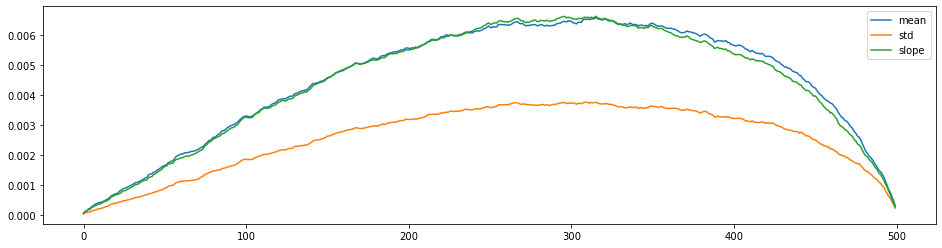

In [15]:
fi1 = tsf.feature_importances_
fi1.columns = ['mean','std','slope']
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
fi1.plot(ax=ax);

# Problem 5: `Apply a RandomIntervalSpectralForest`

* Fit a `RandomIntervalSpectralForest` to `x_train_nested`
* Predict using `x_test_nested`
* Print the Classifier's accuracy score

*Hint: Use `n_jobs=-1` parameter to the classifer to use all the cores on your machine*

In [10]:
from sktime.classification.interval_based import RandomIntervalSpectralForest

rise = RandomIntervalSpectralForest(n_estimators=10,n_jobs=-1)
rise.fit(x_train_nested, y_train)
rise.score(x_test_nested, y_test)

0.906060606060606